<a href="https://www.kaggle.com/code/hyesoorachel/data-science-with-titanic-dataset?scriptVersionId=132568657" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1) Importing libraries & data  

Firstly, we need to import necessary libraries. 

In [2]:
# Import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

Then, we need to read csv file to load train and test data into this lab 

In [3]:
# Reading data 

data_train = pd.read_csv('/kaggle/input/titanic/train.csv')

data_test = pd.read_csv('/kaggle/input/titanic/test.csv')

We would like to combine the train and test data 

In [4]:
# Combining dataset 

df = [data_train, data_test]

## 2) Data exploration 

Numerical data: continuous data is an infinite value that can be measured, discrete data is a finite value that can be counted.  
    
    Continuous (measured): Age, Fare 
    
    Discrete (counted): SibSp, Parch, Pclass 

Categorical data: ordinal data is ordered whereas nominal is unordered. 
    
    Nominal (unordered): Sex, Embarked, Survived 
    
    Ordinal (ordered): Ticket, Cabin 

In [5]:
# description of train data 

data_train.info()
data_train.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# description of test data 

data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2-1) Numerical data description 

**OBSEVATIONS**
* There are 891 passengers in the train data 
* Surival rate is around 38% (342 passengers out of 891) 
* Passengers are around 29-30 years old on average, ranging from less than 1 year old to 80 years old. There are some unknown age values   
* Passengers have a maximum of 8 siblings or spouses
* Passengers have a maximum of 6 parents or children 
* Fare costs 32 dollars on average and can be expensive as 512 dollars 


In [7]:
# numerical feature description 

data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2-2) Categorical data description 

**OBSERVATIONS**
* Each passenger has unique name 
* There are more male passengers than female 
* Many passengers have embarked from Southampton 
* Ticket feature has many duplicates (681 unique value out of 891) 
* Cabin feature has many missing values and duplicates across the train data

In [8]:
# object feature description 

data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
# checking unique values in object column   

data_train.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

## 3) Data visualization 

We would like to analyze data by visualizing it. 

### 3-1) Survival by categorical feature 

**Survival by Ticket class**
* We observe a strong correlation
* The higher the ticket class is, the higher survival rate is 

**Survival by Gender**
* We observe a strong correlation
* Female passengers are more likely to survive than male passengers  

**Survival by Embarked**
* We can see that Port C has higher survival rate, but we can't confirm if this is a direct correlation 


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


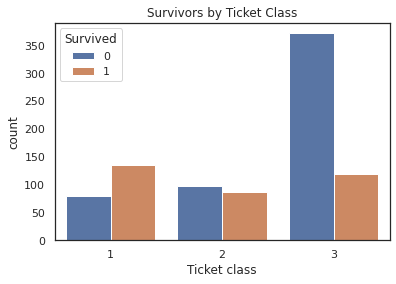

In [10]:
# Survival by ticket class 

sns.set_theme(style="white") 
                                                    
sns.countplot(data=data_train, x='Pclass', hue='Survived').set(title='Survivors by Ticket Class', xlabel='Ticket class') 

print(data_train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived',ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908


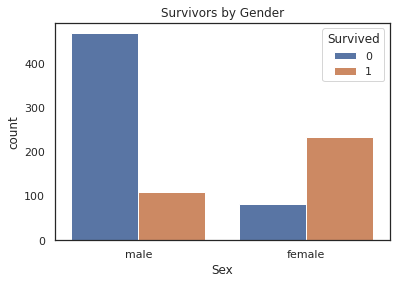

In [11]:
# Survival by Gender 

sns.set_theme(style="white")

sns.countplot(data=data_train, x='Sex', hue='Survived').set(title='Survivors by Gender')

print(data_train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False))

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


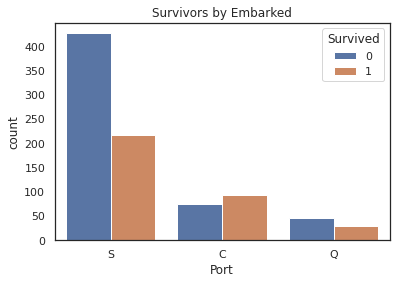

In [12]:
# Survival by Embarkment 
sns.set_theme(style="white")

sns.countplot(data=data_train, x='Embarked', hue='Survived').set(title='Survivors by Embarked', xlabel = 'Port')

print(data_train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False))

### 3-2) Survival by numeric feature 
**Survival by Sibsp** 
* Most passengers are onboard without siblings or spouses, and large number of them didn't survive 
* Passengers with one or two siblings or spouses are more likely to survive 
* We don't see a strong correlation  

**Survival by Parch**
* Most passengers are onboard without parents or children, and large number of them didn't survive
* Passengers with 1-3 parents or children are more likely to survive than those without or have more than 3 
* We don't observe a correlation 

**Survival by Age**
* Young children have high survival rate 
* Large number of passengers between 20-35 years old didn't survive 
* Few oldest passengers who are 80 years old survived  

**Survival by Fare** 
* Large number of passengers who paid the cheapest (0-50 dollars) didn't survive 
* Few passengers who paid the most expensive (512 dollars) survived 


   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


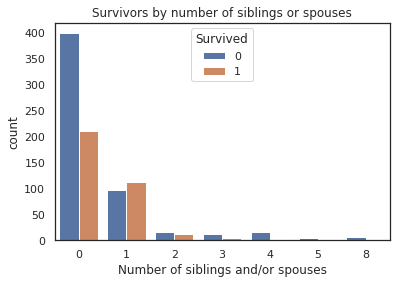

In [13]:
# Survival by Sib Sp 
sns.set_theme(style="white")

sns.countplot(data=data_train, x='SibSp', hue='Survived').set(title='Survivors by number of siblings or spouses', 
                                                              xlabel='Number of siblings and/or spouses')

print(data_train[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False))


   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


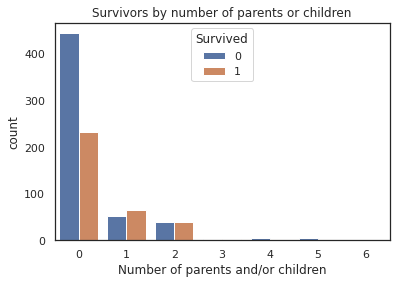

In [14]:
# Survival rate by Par ch 
sns.set_theme(style="white")

sns.countplot(data=data_train, x='Parch', hue='Survived').set(title='Survivors by number of parents or children'
                                                             ,xlabel='Number of parents and/or children')

print(data_train[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)) 

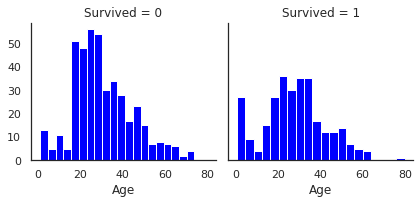

In [15]:
# Visualizing correlation between Age and Survival 

g1 = sns.FacetGrid(data_train, col='Survived')
g1.map(plt.hist, 'Age', bins= 20, color='blue')

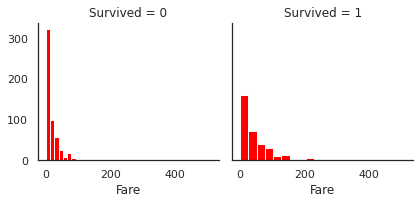

In [16]:
# Visualizing correlation between Fare and Survival 

g2 = sns.FacetGrid(data_train, col='Survived')
g2.map(plt.hist, 'Fare', bins=20, color='red')

### 3-3) Correlating numerical and ordinal features 

#### Correlation between Ticket class and Age
* Most passengers in the 3rd class didn't survive 
* Passengers in the 1st class have a higher number of survivals than 2nd or 3rd class 
* Young passengers have a higher survival rate regardless of ticket class 

#### Corrleation between Ticket class and Fare 
* The higher the ticket class, passengers are more likely to survive even if they didn't pay much
* Large number of passengers in the 3rd class didn't survive 

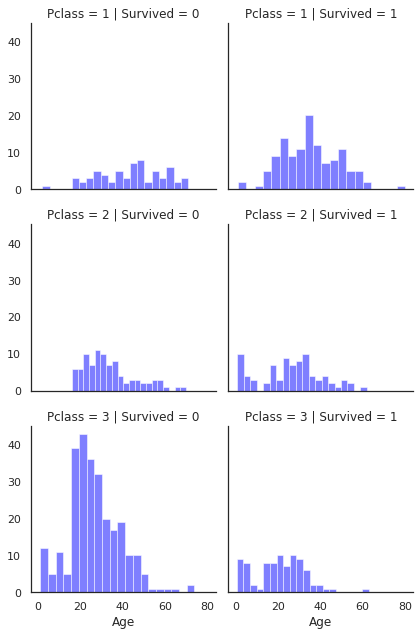

In [17]:
# Visualizing correlation between Age, Pclass and Survival 

g3 = sns.FacetGrid(data_train, col='Survived', row='Pclass')
g3.map(plt.hist, 'Age', bins=20, color='blue', alpha=.5)


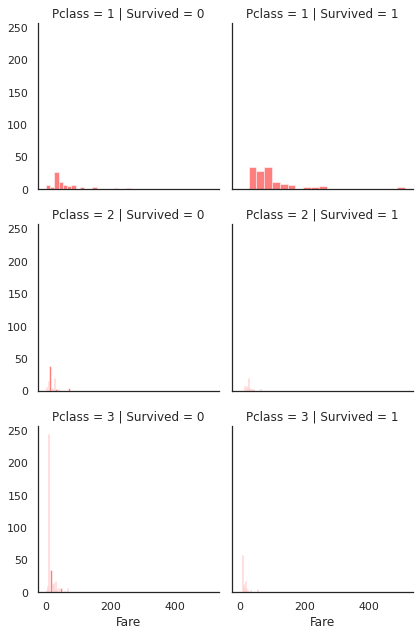

In [18]:
# Visualizing correlation between Fare, Pclass and Survival 

g4 = sns.FacetGrid(data_train, col='Survived', row='Pclass')
g4.map(plt.hist, 'Fare', bins=20, color='red', alpha=0.5)

### 3-4) Correlating categorical and numerical features 

#### Correlation between Sex, Fare and Embarked 
* Passengers who paid higher fare are more likely to survive 
* Passengers who embarked from Port C paid higher fare 
* Passengers who embarked from Port Q paid cheaper fare 

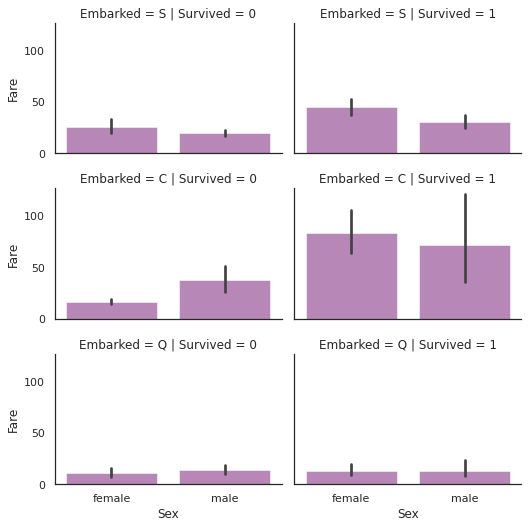

In [19]:
# Visualizing correlation between Sex, Fare and Embarked Features 

g5 = sns.FacetGrid(data=data_train, col='Survived', row='Embarked', height =2.5, aspect =1.5)
g5.map(sns.barplot, 'Sex', 'Fare', order=['female', 'male'], color='purple', alpha=0.5)


### As a result of observation: 
* PassengerId : we may drop it 
* Pclass : no need to wrangle
* Name : need to use it to extract title to create a new column 'Title' 
* Age : deal with missing value, create a age band then convert it to numeric feature 
* Sex : convert it to a numeric feature 
* SibSp : 0~8, combine with Parch column then create a new column 'IsAlone'
* Parch : 0~6, combine with SibSp column then create a new column 'IsAlone'
* Ticket : drop it 
* Fare : 0~512, create a band then convert it to numeric 
* Cabin : drop it 
* Embarked : deal with missing value, convert it to numeric 

## 4) Cleaning & Wrangling data 

### Before we proceed to select models to predict, we need to clean and wrangle data. 
#### 1.Dropping unnecessary columns 
#### 2.Dealing with missing values 
#### 3.Creating a new feature 
#### 4.Converting it to different data type 



### 4-1) Dropping : [Cabin], [Ticket] columns 

Based on the result of observation, we need to drop some features to speed up our analysis.

We are dropping Cabin and Ticket columns because we can't extract much information from these columns. 

There are other columns that can be removed but we need to save them for now.

In [20]:
# Remove Cabin column, it has so many missing values and not useful for analysis 

data_train = data_train.drop(columns = ['Cabin', 'Ticket'], axis = 1)
data_test = data_test.drop(['Cabin', 'Ticket'], axis=1)
df = [data_train, data_test]

### 4-2) Dealing with missing value & Creating a new column [Age_group] as numeric feature : [Age] column 

There are several methods to handle missing data. 

The first method to handle missing value is to drop the column when it contains less than 5% of missing values. 

With [Age] column, it is better to implement the second method which is to impute with educated guesses, since we have more than 5% (19%) of missing value found in the column. 

We can handle this by replacing them with mean. (For categorical values, it is better to use the mode). 


In [21]:
# Dealing with missing data of Age column in train & test: filling missing value with mean (missing value 19%)

print(data_train['Age'].isnull().value_counts()) 
print(data_test['Age'].isnull().value_counts()) 

data_train['Age'].fillna(value=data_train['Age'].mean(), inplace=True)
data_test['Age'].fillna(value=data_test['Age'].mean(), inplace=True)

False    714
True     177
Name: Age, dtype: int64
False    332
True      86
Name: Age, dtype: int64


In [22]:
# Confirm the number of missing values in Age column 

print(data_train['Age'].isnull().value_counts()) 
print(data_test['Age'].isnull().value_counts())

# Combine train and test data 

df = [data_train, data_test]

False    891
Name: Age, dtype: int64
False    418
Name: Age, dtype: int64


Then we are going to create a new column with age band as numeric. 

In [23]:
# Creating Age group column & convert it to numeric 

for dataset in df:  
    dataset.loc[dataset['Age'] <= 16.0, 'Age_group'] = 0
    dataset.loc[(dataset['Age'] > 16.0) & (dataset['Age'] <= 32.0), 'Age_group'] = 1
    dataset.loc[(dataset['Age'] > 32.0) & (dataset['Age'] <= 48.0),  'Age_group'] = 2
    dataset.loc[(dataset['Age'] > 48.0) & (dataset['Age'] <= 64.0), 'Age_group'] = 3
    dataset.loc[dataset['Age'] > 64.0, 'Age_group'] = 4 
    dataset['Age_group'] = dataset['Age_group'].astype(int) 

In [24]:
# Checking the survival rate by Age group 

data_train[['Age_group', 'Survived']].groupby('Age_group', as_index=False).mean().sort_values(by='Age_group',ascending=True)

,Age_group,Survived
0,0,0.550000
1,1,0.344168
2,2,0.404255
3,3,0.434783
4,4,0.090909


In [25]:
# Now we can drop [Age] column 

data_train = data_train.drop(['Age'], axis=1)
data_test = data_test.drop(['Age'], axis=1)

df=[data_train, data_test]

### 4-3) Dealing with missing value & converting it to numeric : [Embarked] column 
We will handle 2 missing values found in [Embarked] column by filling them with the most frequent value. 

Then we need to convert it to numeric data type. 

In [26]:
# Converting Embarked into numeric band 
freq_port = data_train['Embarked'].dropna().mode()[0]
freq_port 

'S'

In [27]:
# Filling missing values with the most frequent port ('S')  

for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port) 
    
# Checking the survival rate by port 

data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)    

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [28]:
# Convert the column into numeric value 

for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### 4-4) Creating a new feature [Fare_band] as numeric feature : [Fare] column

We will create a new fare band then convert this to numeric value. 

Before that, we need to fill some of the missing values found in test data. 

In [29]:
# Filling missing values with median in test data 

data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Age_group    418 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


In [30]:
# Looking at survival rate by Fare group 

data_train['Fare_group'] = pd.qcut(data_train['Fare'], 4) 
data_train[['Fare_group', 'Survived']].groupby(['Fare_group'], as_index=False).mean().sort_values(by='Fare_group', ascending=True)

,Fare_group,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [31]:
# Creating a Fare band based on the Fare group in train data 

for dataset in df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int) 

In [32]:
# Drop the Fare group column from train data then combine train and test data 

data_train = data_train.drop(['Fare_group'], axis=1)

df= [data_train, data_test] 

### 4-5) Creating a new column : [IsAlone] by combining [SibSp], [Parch] columns

[SibSp], [Parch] columns contain the information that we can combine to create a new column, after that we will be able to drop these two columns from our dataset to speed up our analysis.  

In [33]:
# Creating a FamilySize column that combines the number of siblings, spouses, parents & children 

for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

data_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [34]:
# Survival rate by IsAlone column

for dataset in df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

data_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We can then drop the SibSp, Parch, FamilySize columns from dataset 

In [35]:
# Drop SibSp, Parch, FamilySize columns then combine train data and test data 

data_train = data_train.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
data_test = data_test.drop(['SibSp','Parch', 'FamilySize'], axis=1)

df=[data_train, data_test]


### 4-6) Creating a new column : [Title] extracted from [Age], [Name] columns 

We observed that [Name] column contains titles such as Mr., Mrs., Miss., and so on. 

We would like to see if there can any correlation be extracted from Title with Survived. 

Since we can see that title ends with "." in each occurence so we will use RegEx patter to extract the title from Name column. 

"[A-Za-z]" - starting with any characters, lower case and upper case.

"+" = match 1 or more. 

"\." = period, must followed by backslash otherwise extract any character. 

In [36]:
# Extracting title 

for dataset in df: 
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(data_train['Title'], data_train['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We will combine many titles to more common ones and replace less common titles with 'Other'. 

In [37]:
for dataset in df: 
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    
data_train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [38]:
# Converting it to ordinal feature 

for dataset in df:
    dataset['Title'] = dataset['Title'].map( {'Master': 1, 'Miss': 2, 'Mr': 3, 'Mrs':4, 'Other':5} )
    dataset['Title'] = dataset['Title'].fillna(0)
    
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Fare,Embarked,Age_group,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,0,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,0,2,0,4
4,5,0,3,"Allen, Mr. William Henry",male,1,0,2,1,3


We can drop [Name] and [PassengerId] columns from the dataset. 

In [39]:
# Dropping unnecessary columns 

data_train = data_train.drop(['PassengerId', 'Name'], axis = 1)
data_test = data_test.drop(['Name'], axis = 1)

df=[data_train, data_test]

### 4-7) Converting it to integer : [Sex] column
We need to convert Sex feature into numerical value, female : 1 and male : 0 

In [40]:
# Converting Sex into numeric band 

for dataset in df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [41]:
data_train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_group,IsAlone,Title
0,0,3,0,0,0,1,0,3
1,1,1,1,3,1,2,0,4
2,1,3,1,1,0,1,1,2
3,1,1,1,3,0,2,0,4
4,0,3,0,1,0,2,1,3


In [42]:
data_test.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Age_group,IsAlone,Title
0,892,3,0,0,2,2,1,3.0
1,893,3,1,0,0,2,0,4.0
2,894,2,0,1,2,3,1,3.0
3,895,3,0,1,0,1,1,3.0
4,896,3,1,1,0,1,0,4.0


## 5) Model & Prediction 

#### We are ready to choose the models to predict who is likely survive in the test data. 

In this problem, our dependent variable (y, target) is Survived or not. 

Our independent variables (x, predictor) are Sex, Fare, Port, Age, and so on. 

This is a classification problem since our target variable (survived or not) is not continuous thus we would like to use the following supervised learning technics to solve the problem.   

* Logistic Regression 
* KNN or k-Nearest Neighbors 
* SVM or Support Vector Machines 
* Decision Tree Classifier
* Random Forest Classifier
* Gradient Boosting Classifier 

Firstly, we would like to split the train data.   

In [43]:
X_train = data_train.drop('Survived', axis=1) 
y_train = data_train['Survived'] 

X_test = data_test.drop('PassengerId', axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### 5-1) Logistic Regression 

Logistic regression estimates the probability of an outcome achieving based on the predictors. 

In [44]:
# Logistic regression 

logreg = LogisticRegression() 
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_logreg = round(logreg.score(X_train, y_train) * 100, 2)

acc_logreg 

78.68

### 5-2) KNN or k-Nearest Neighbors 

KNN looks at K closest data points then take a majority vote. 

In [45]:
# KNN 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

acc_knn 

84.85

### 5-3) SVM or Support Vector Machines 

Support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. 

Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. (Reference: [wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)) 

In [46]:
# SVM 

svc = SVC()
svc.fit(X_train, y_train) 

y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

81.93

### 5-4) Decision Tree Classifier 

A classification tree divides the feature space into rectangular regions. 

The sequence follows if-else questions about individual features and its objective is to infer class labels. 

Decision tree is a data structure consisting of a hierarchy node, which is prediction or question. 

In [47]:
# Decision tree classifier 

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train) 

y_pred = DT.predict(X_test) 

acc_DT = round(DT.score(X_train, y_train) * 100, 2)
acc_DT 

86.87

### 5-5) Random Forest Classifier 

In Random Forest, base estimator is Decision tree whereas it can be any model in Bagging. 

Each estimator is trained on different bootstrap sample having the same size as the training set, whereas each estimator is trained on a distinct bootstrap sample of the training set using all available features in Bagging. 

Thus, Random Forest introduces more randomization and it performs well with large datasets with high dimensionality. 

In Random Forest classification, it aggregates prediction by majority voting. 

In [48]:
# Random Forest Classifier 

RF = RandomForestClassifier() 
RF.fit(X_train, y_train) 

y_pred = RF.predict(X_test) 

acc_RF = round(RF.score(X_train, y_train) * 100, 2) 
acc_RF

86.87

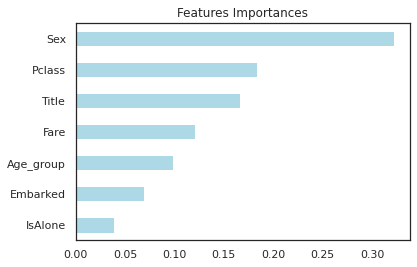

In [49]:
# Feature importance 

importances = pd.Series(data=RF.feature_importances_, index=X_train.columns) 
importances_sorted = importances.sort_values() 

importances_sorted.plot(kind='barh', color='lightblue')
plt.title('Features Importances')
plt.show() 

### 5-6) Gradient Boosting Classifier 

Unlike AdaBoosting whose predictor corrects the error of its predecessor, in Gradient Boosting each predictor is trained using predecessor's residual error as labels. 

In [50]:
# Gradient Boosting Classifier 

GB = GradientBoostingClassifier() 
GB.fit(X_train, y_train) 

y_pred = GB.predict(X_test) 

acc_GB = round(GB.score(X_train, y_train) * 100, 2)
acc_GB 

85.07

## 6) Evaluation

### Model evaluation

Based on scores above, we can sort the scores of all the models. 

While both Decision Tree and Random Forest have the same scores (86.87), we decide to use Random Forest as they correct for Decision tree's habiot of overfitting to the training set. 

In [51]:
Models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score': [acc_logreg, acc_knn, acc_svc, acc_DT, acc_RF, acc_GB]})

Models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,86.87
4,Random Forest,86.87
5,Gradient Boosting,85.07
1,KNN,84.85
2,Support Vector Machines,81.93
0,Logistic Regression,78.68


## 7) Submission 

In [52]:
# Prediction from Random Forest classifier 

                      
output = pd.DataFrame(
    { 'PassengerId' : data_test['PassengerId'], 
     'Survived': y_pred })
output.to_csv('submission.csv', index=False)